In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [0]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def boostrap_mean(sample, sample_size, n_iterations):
	x = np.random.choice(sample,size=(n_iterations,sample_size))	
	mean = np.mean(x, axis=1)

	calc_mean = np.mean(mean)
	lower = np.percentile(mean, 2.5)
	upper = np.percentile(mean, 97.5)
	print(upper, lower)
	return calc_mean, lower, upper



12.401785714285712 6.707142857142857
12.53749999999999 6.5339285714285715
12.394642857142848 6.5
12.537500000000007 6.5
12.214285714285714 6.5
12.428571428571429 6.428571428571429
12.357142857142858 6.4625
12.428571428571429 6.428571428571429
12.428571428571429 6.428571428571429
12.357142857142858 6.462500000000002
12.285714285714286 6.5
12.357142857142858 6.5
12.357142857142858 6.428571428571429
12.357142857142858 6.5
12.357142857142858 6.428571428571429
12.39464285714283 6.428571428571429
12.357142857142858 6.428571428571429
12.428571428571429 6.428571428571429
12.357142857142858 6.428571428571429
12.357142857142858 6.428571428571429
12.357142857142858 6.428571428571429
12.285714285714286 6.428571428571429
12.428571428571429 6.428571428571429
12.357142857142858 6.428571428571429
12.357142857142858 6.428571428571429
12.428571428571429 6.428571428571429
12.357142857142858 6.428571428571429
12.357142857142858 6.5
12.428571428571429 6.428571428571429
12.357142857142858 6.428571428571429


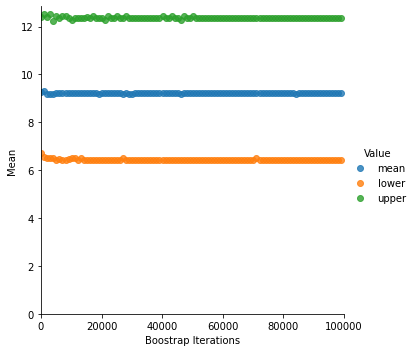

In [0]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')




Now, modify the bootstrap function so that you can pass your desired confidence interval as a parameter.



In [0]:
	def boostrap_mean_ci(sample, sample_size, iterations, ci):
		iterated = np.random.choice(sample,(iterations,sample_size))
		calc_mean = np.mean(iterated)
		my_mean = []

		for i in range(iterations):
  		mean= np.mean(iterated [i, :])	 
  		my_mean.insert(i,mean)
		l_pr = (100 - ci)/2
		u_pr = ((100 - ci)/2) + ci
		lower = np.percentile(my_mean, l_pr)
		upper = np.percentile(my_mean, u_pr)
		return calc_mean, lower, upper

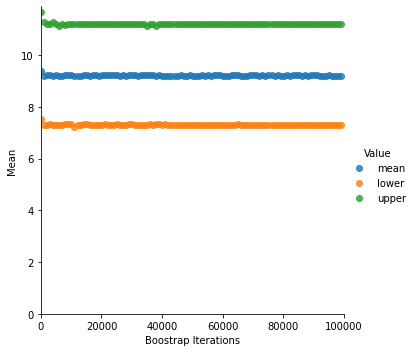

In [0]:

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset. Load the vehicles.csv file and check the Moodle page for instructions on how to proceed


In [0]:

# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
df

,Current fleet,New Fleet
0,18,24.0
1,15,27.0
2,18,27.0
3,16,25.0
4,17,31.0
...,...,...
244,27,NaN
245,27,NaN
246,32,NaN
247,28,NaN


Current Fleet = Blue   New Fleet = Orange


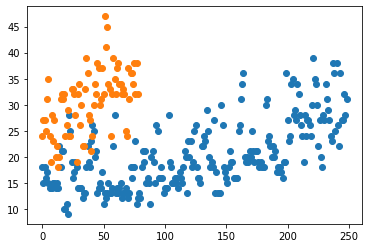

In [0]:
val = len(df['Current fleet'])
x = np.arange(0, val, 1)
y= df.iloc[:, 0]
plt.scatter(x, y)

val = len(df['New Fleet'])
x = np.arange(0, val, 1)
y = df.iloc[:, 1]
plt.scatter(x, y)

print("Current Fleet = Blue   New Fleet = Orange")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f81c56fd048>,
      dtype=object)

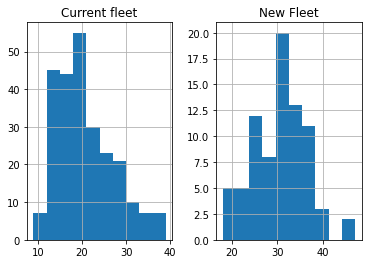

In [0]:
import matplotlib.pyplot as plt
pd.DataFrame.hist(df)